In [28]:
import pandas as pd

In [29]:
from sklearn.datasets import load_iris

In [30]:
iris=load_iris()

In [31]:
x=iris.data
y=iris.target

In [32]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
#split data
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)

In [36]:
#standardise data
from sklearn.preprocessing import StandardScaler

In [37]:
std=StandardScaler()

In [38]:
std.fit(x_train)

StandardScaler()

In [39]:
x_train_std=std.transform(x_train)
x_test_std=std.transform(x_test)

In [40]:
# Neural Network
import torch
from torch.nn import functional as F
import torch.nn as nn
from torch.autograd import Variable

In [41]:
# Define network
class Model(nn.Module):
    def __init__(self,input_dim):
        super(Model, self).__init__()
        self.layer1=nn.Linear(input_dim,50)
        self.layer2=nn.Linear(50,50)
        self.layer3=nn.Linear(50,3)
    def forward(self,x):
        x=F.relu(self.layer1(x))
        x=F.relu(self.layer2(x))
        x=F.softmax(self.layer3(x),dim=1)
        return(x)

In [42]:
model=Model(x_train.shape[1])
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.CrossEntropyLoss()

In [43]:
model

Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

In [44]:
import tqdm # create logs

In [57]:
epochs=100
x_train=Variable(torch.from_numpy(x_train_std)).float()
y_train=Variable(torch.from_numpy(y_train)).long()
x_test=Variable(torch.from_numpy(x_test_std)).float()
y_test=Variable(torch.from_numpy(y_test)).long()

TypeError: expected np.ndarray (got Tensor)

In [46]:
import numpy as np

In [47]:
loss_list=np.zeros((epochs,))
accuracy_list=np.zeros((epochs,))

In [49]:
for epoch in tqdm.trange(epochs):
    y_pred=model(x_train)
    loss=loss_fn(y_pred,y_train)
    loss_list[epoch]=loss.item()
    
    # Zero gradient
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred=model(x_test)
        correct=(torch.argmax(y_pred,dim=1)==y_test).type(torch.FloatTensor)
        accuracy_list[epoch]=correct.mean()

100%|██████████| 100/100 [00:01<00:00, 68.34it/s]


In [60]:
torch.argmax( model(x_train),dim=1)

tensor([2, 2, 0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0,
        0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1,
        0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2,
        1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0])

In [55]:
model.forward(x_train)

tensor([[1.4238e-05, 5.3366e-03, 9.9465e-01],
        [1.0105e-03, 3.5851e-02, 9.6314e-01],
        [9.8734e-01, 1.1869e-02, 7.9002e-04],
        [9.8604e-01, 1.2862e-02, 1.0940e-03],
        [3.5652e-02, 8.6366e-01, 1.0068e-01],
        [7.4362e-01, 2.5546e-01, 9.1710e-04],
        [5.9927e-02, 4.9968e-01, 4.4039e-01],
        [9.9659e-01, 3.2559e-03, 1.5618e-04],
        [2.1720e-02, 5.9951e-01, 3.7877e-01],
        [3.1194e-02, 3.0869e-01, 6.6012e-01],
        [3.5010e-03, 1.1348e-01, 8.8302e-01],
        [6.0067e-04, 1.3544e-02, 9.8586e-01],
        [2.0360e-03, 5.2392e-01, 4.7404e-01],
        [5.7396e-04, 1.0159e-02, 9.8927e-01],
        [1.5375e-02, 9.6067e-01, 2.3957e-02],
        [3.2114e-02, 7.0790e-01, 2.5999e-01],
        [5.7182e-02, 6.7633e-01, 2.6649e-01],
        [9.9109e-01, 8.4326e-03, 4.8038e-04],
        [9.9186e-01, 7.6423e-03, 4.9882e-04],
        [3.1568e-02, 7.4479e-01, 2.2364e-01],
        [9.7888e-01, 2.0022e-02, 1.0980e-03],
        [7.2201e-03, 1.5263e-01, 8

In [59]:
model(x_train)

tensor([[1.4238e-05, 5.3366e-03, 9.9465e-01],
        [1.0105e-03, 3.5851e-02, 9.6314e-01],
        [9.8734e-01, 1.1869e-02, 7.9002e-04],
        [9.8604e-01, 1.2862e-02, 1.0940e-03],
        [3.5652e-02, 8.6366e-01, 1.0068e-01],
        [7.4362e-01, 2.5546e-01, 9.1710e-04],
        [5.9927e-02, 4.9968e-01, 4.4039e-01],
        [9.9659e-01, 3.2559e-03, 1.5618e-04],
        [2.1720e-02, 5.9951e-01, 3.7877e-01],
        [3.1194e-02, 3.0869e-01, 6.6012e-01],
        [3.5010e-03, 1.1348e-01, 8.8302e-01],
        [6.0067e-04, 1.3544e-02, 9.8586e-01],
        [2.0360e-03, 5.2392e-01, 4.7404e-01],
        [5.7396e-04, 1.0159e-02, 9.8927e-01],
        [1.5375e-02, 9.6067e-01, 2.3957e-02],
        [3.2114e-02, 7.0790e-01, 2.5999e-01],
        [5.7182e-02, 6.7633e-01, 2.6649e-01],
        [9.9109e-01, 8.4326e-03, 4.8038e-04],
        [9.9186e-01, 7.6423e-03, 4.9882e-04],
        [3.1568e-02, 7.4479e-01, 2.2364e-01],
        [9.7888e-01, 2.0022e-02, 1.0980e-03],
        [7.2201e-03, 1.5263e-01, 8

In [61]:
from matplotlib import pyplot as plt

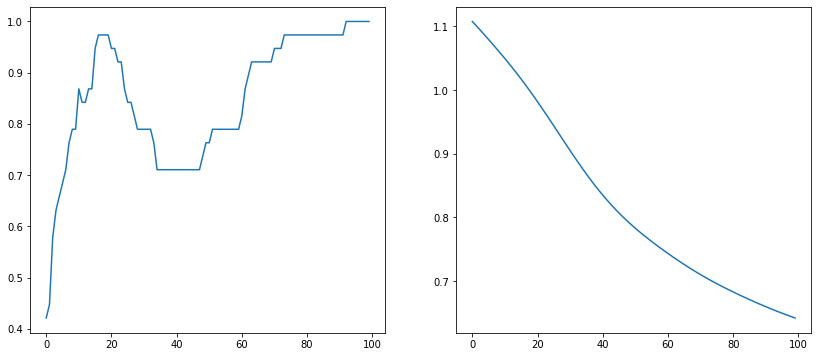

In [64]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(accuracy_list)
plt.subplot(1,2,2)
plt.plot(loss_list)
plt.show()